In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

In [36]:
def window(sequences, look_back):
    X, y = [], []
    for i in range(len(sequences)-look_back-1):
        x = sequences[i:(i+look_back)]
        X.append(x)
        y.append(sequences[i + look_back])
    return np.array(X), np.array(y)

In [37]:
url = 'https://raw.githubusercontent.com/kboroz/TimeSeriesPrediction/refs/heads/main/Data/Bitcoin.csv'

ts_data = pd.read_csv(url)

look_back = 5
X, y = window(ts_data.values, look_back)

In [39]:
# Drop the first column (date column)
ts_data = ts_data.iloc[:, 1:]

# Ensure all data is in float format
ts_data = ts_data.astype(np.float32)

look_back = 5
X, y = window(ts_data.values, look_back)

# Ensure no NaN values and convert to float32
X = np.nan_to_num(X).astype(np.float32)
y = np.nan_to_num(y).astype(np.float32)

In [40]:
# Train-test split
train_ratio = 0.8
train_size = int(train_ratio * len(ts_data))
X_train, X_test = X[:train_size-look_back], X[train_size-look_back:]
y_train, y_test = y[:train_size-look_back], y[train_size-look_back:]


In [42]:
# Create and train LSTM model
model = Sequential()
model.add(LSTM(units=128, activation='swish', input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['mape'])

model.fit(x=X_train, y=y_train, epochs=50, batch_size=100, verbose=2)

Epoch 1/50
14/14 - 4s - loss: 499784224.0000 - mape: 87.5169 - 4s/epoch - 292ms/step
Epoch 2/50
14/14 - 0s - loss: 300647456.0000 - mape: 67.9941 - 178ms/epoch - 13ms/step
Epoch 3/50
14/14 - 0s - loss: 108239000.0000 - mape: 38.8539 - 195ms/epoch - 14ms/step
Epoch 4/50
14/14 - 0s - loss: 5853273.5000 - mape: 7.3557 - 178ms/epoch - 13ms/step
Epoch 5/50
14/14 - 0s - loss: 4027546.5000 - mape: 6.1979 - 197ms/epoch - 14ms/step
Epoch 6/50
14/14 - 0s - loss: 3246409.7500 - mape: 5.2890 - 188ms/epoch - 13ms/step
Epoch 7/50
14/14 - 0s - loss: 2771456.5000 - mape: 4.8257 - 177ms/epoch - 13ms/step
Epoch 8/50
14/14 - 0s - loss: 2563565.2500 - mape: 4.4992 - 186ms/epoch - 13ms/step
Epoch 9/50
14/14 - 0s - loss: 2563022.0000 - mape: 4.4145 - 199ms/epoch - 14ms/step
Epoch 10/50
14/14 - 0s - loss: 2254739.2500 - mape: 4.1395 - 208ms/epoch - 15ms/step
Epoch 11/50
14/14 - 0s - loss: 2253515.5000 - mape: 4.1458 - 184ms/epoch - 13ms/step
Epoch 12/50
14/14 - 0s - loss: 2281639.5000 - mape: 4.2424 - 193ms/

In [43]:
# Make predictions
forecasts = model.predict(X_test)
lstm_fits = model.predict(X_train)

42/42 [==============================] - 0s 6ms/step


In [44]:
# Calculate metrics
mape = mean_absolute_percentage_error(y_test, forecasts)
r2 = r2_score(y_train, lstm_fits)


In [45]:
# Initialize dates
date_range = pd.date_range(start='2018-04-01', end='2022-10-31', freq='D')

# Add empty values in fits to match the original time series
fits = np.full(train_size, np.nan)
for i in range(train_size-look_back):
    fits[i+look_back] = lstm_fits[i]

<ipython-input-45-e31ecf4608cf>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fits[i+look_back] = lstm_fits[i]


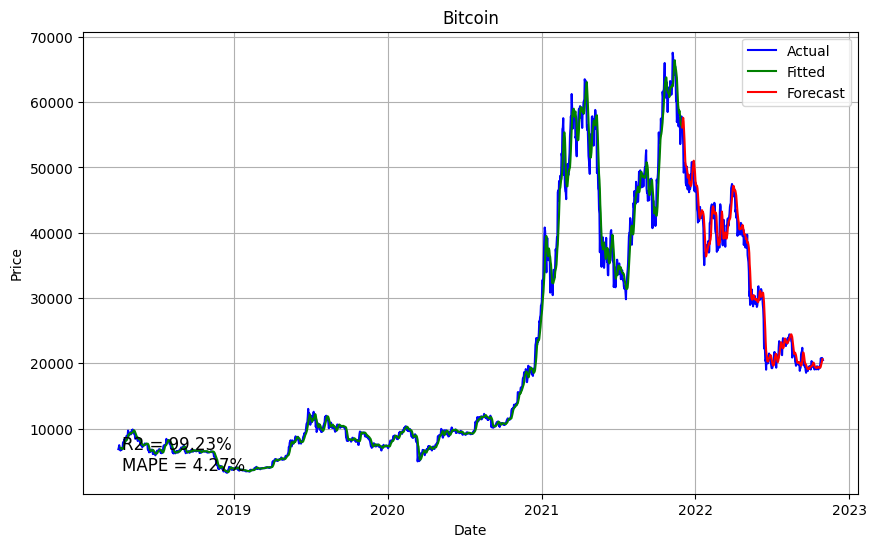

In [46]:
# Align forecasts to date_range length
forecasts = forecasts.flatten()

# Plot actual, fits, and forecasts
plt.figure(figsize=(10, 6))
plt.plot(date_range[:len(ts_data)], ts_data, label='Actual', color='blue')
plt.plot(date_range[:train_size], fits, label='Fitted', color='green')
plt.plot(date_range[train_size:train_size+len(forecasts)], forecasts, label='Forecast', color='red')
plt.title('Bitcoin')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.text(0.05, 0.05, f'R2 = {r2*100:.2f}%\nMAPE = {mape*100:.2f}%', transform=plt.gca().transAxes, fontsize=12)
plt.grid(True)
plt.show()

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

def window(sequences, look_back):
    X, y = [], []
    for i in range(len(sequences)-look_back-1):
        x = sequences[i:(i+look_back)]
        X.append(x)
        y.append(sequences[i + look_back])
    return np.array(X), np.array(y)

url = 'https://raw.githubusercontent.com/kboroz/TimeSeriesPrediction/refs/heads/main/Data/Bitcoin.csv'

ts_data = pd.read_csv(url)

look_back = 5
X, y = window(ts_data.values, look_back)




In [58]:
# Drop the first column (date column)
ts_data = ts_data.iloc[:, 1:]
# Ensure all data is in float format
ts_data = ts_data.astype(np.float32)

look_back = 5
X, y = window(ts_data.values, look_back)


Epoch 1/50
14/14 - 2s - loss: 502230208.0000 - mape: 88.0800 - 2s/epoch - 126ms/step
Epoch 2/50
14/14 - 0s - loss: 327342880.0000 - mape: 70.4883 - 135ms/epoch - 10ms/step
Epoch 3/50
14/14 - 0s - loss: 132022160.0000 - mape: 44.4383 - 144ms/epoch - 10ms/step
Epoch 4/50
14/14 - 0s - loss: 11017741.0000 - mape: 9.6625 - 142ms/epoch - 10ms/step
Epoch 5/50
14/14 - 0s - loss: 2321632.2500 - mape: 4.4354 - 139ms/epoch - 10ms/step
Epoch 6/50
14/14 - 0s - loss: 1902341.7500 - mape: 3.8874 - 148ms/epoch - 11ms/step
Epoch 7/50
14/14 - 0s - loss: 2159358.0000 - mape: 4.1772 - 142ms/epoch - 10ms/step
Epoch 8/50
14/14 - 0s - loss: 1967379.1250 - mape: 3.9153 - 156ms/epoch - 11ms/step
Epoch 9/50
14/14 - 0s - loss: 1866305.0000 - mape: 3.7896 - 138ms/epoch - 10ms/step
Epoch 10/50
14/14 - 0s - loss: 1906130.8750 - mape: 3.7552 - 141ms/epoch - 10ms/step
Epoch 11/50
14/14 - 0s - loss: 1796123.0000 - mape: 3.6857 - 145ms/epoch - 10ms/step
Epoch 12/50
14/14 - 0s - loss: 1780045.8750 - mape: 3.6464 - 134ms

<ipython-input-59-1caf2e5783d9>:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fits[i+look_back] = lstm_fits[i]


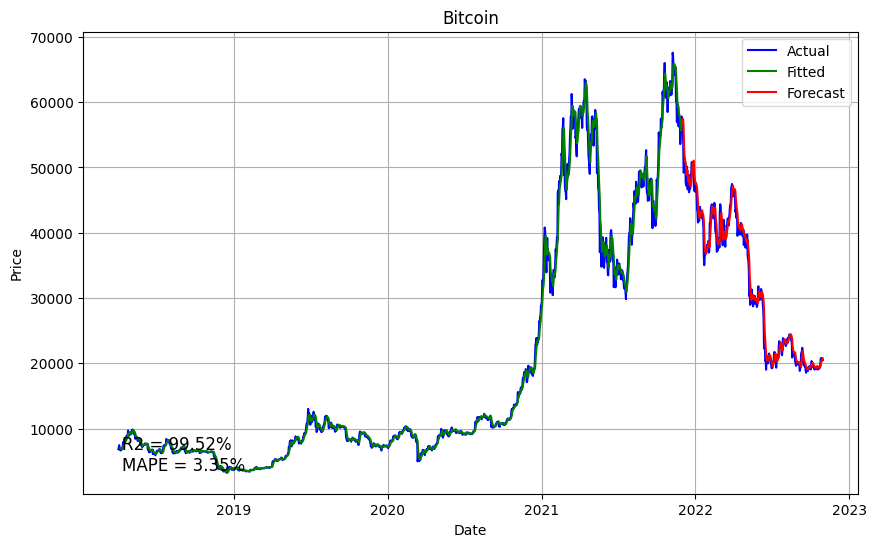

In [59]:

# Ensure no NaN values and convert to float32
X = np.nan_to_num(X).astype(np.float32)
y = np.nan_to_num(y).astype(np.float32)

# Train-test split
train_ratio = 0.8
train_size = int(train_ratio * len(ts_data))
X_train, X_test = X[:train_size-look_back], X[train_size-look_back:]
y_train, y_test = y[:train_size-look_back], y[train_size-look_back:]

# Create and train LSTM model
model = Sequential()
model.add(GRU(units=128, activation='relu', input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['mape'])

model.fit(x=X_train, y=y_train, epochs=50, batch_size=100, verbose=2)

# Make predictions
forecasts = model.predict(X_test)
lstm_fits = model.predict(X_train)

# Calculate metrics
mape = mean_absolute_percentage_error(y_test, forecasts)
r2 = r2_score(y_train, lstm_fits)

# Initialize dates
date_range = pd.date_range(start='2018-04-01', end='2022-10-31', freq='D')

# Add empty values in fits to match the original time series
fits = np.full(train_size, np.nan)
for i in range(train_size-look_back):
    fits[i+look_back] = lstm_fits[i]

# Align forecasts to date_range length
forecasts = forecasts.flatten()

# Plot actual, fits, and forecasts
plt.figure(figsize=(10, 6))
plt.plot(date_range[:len(ts_data)], ts_data, label='Actual', color='blue')
plt.plot(date_range[:train_size], fits, label='Fitted', color='green')
plt.plot(date_range[train_size:train_size+len(forecasts)], forecasts, label='Forecast', color='red')
plt.title('Bitcoin')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.text(0.05, 0.05, f'R2 = {r2*100:.2f}%\nMAPE = {mape*100:.2f}%', transform=plt.gca().transAxes, fontsize=12)
plt.grid(True)
plt.show()